In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('titanic_train.csv')

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


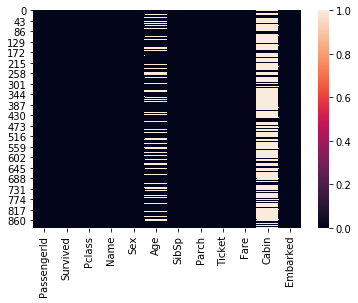

In [17]:
sns.heatmap(train.isnull())

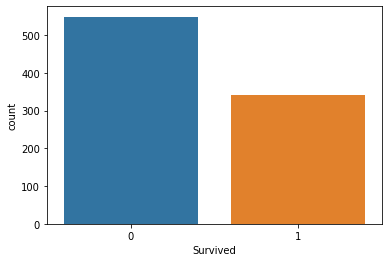

In [18]:
sns.countplot(x='Survived', data=train)

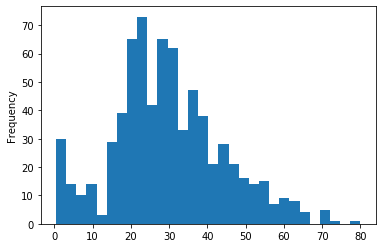

In [14]:
train['Age'].plot.hist(bins=30)

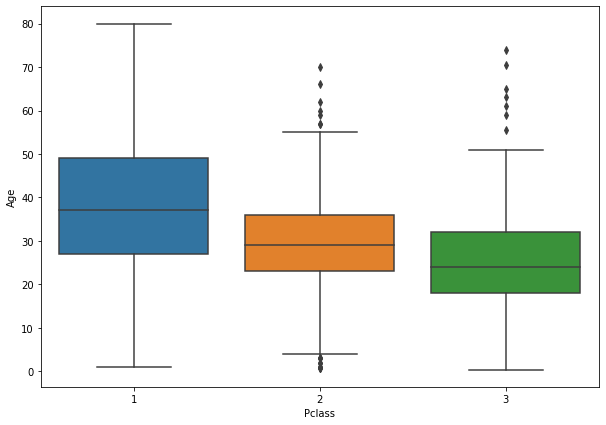

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [29]:


def agechange(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif (Pclass==2):
            return 28
        else:
            return 24
    else:
        return Age
train['Age']=train[['Age','Pclass']].apply(agechange,axis=1)


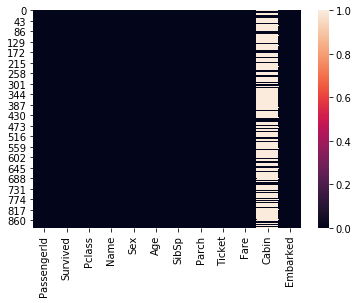

In [23]:
sns.heatmap(train.isnull())

In [31]:
train.drop('Cabin', axis=1, inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


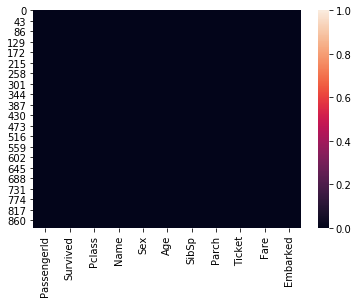

In [34]:
sns.heatmap(train.isnull())

In [35]:
train.dropna(inplace=True)

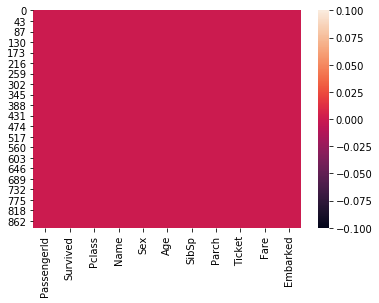

In [37]:
sns.heatmap(train.isnull())

In [38]:
sex=pd.get_dummies(train['Sex'], drop_first=True)

In [39]:
embark=pd.get_dummies(train['Embarked'], drop_first=True)

In [40]:
train=pd.concat([train, sex, embark], axis=1)

In [41]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [45]:
train.drop(['Sex', 'Embarked','Name', 'Ticket'], inplace=True, axis=1)

KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [47]:
train.drop('PassengerId', inplace=True, axis=1)

In [48]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [51]:
X=train.drop('Survived', axis=1)
y=train['Survived']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)





LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
prediction=model.predict(X_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

